In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
%matplotlib inline
from bokeh.layouts import layout
from bokeh.core.properties import value
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
output_file('sample1.html')

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
x_train = train_data.iloc[:,:-1]
y_train = train_data['subscribed']

In [7]:
x_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [8]:
y_train.head()

0     no
1     no
2     no
3    yes
4     no
Name: subscribed, dtype: object

In [23]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
y_train.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

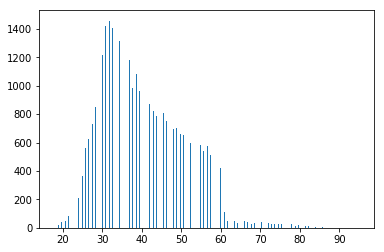

In [11]:
plt.hist(train_data['age'], bins=90, width=0.2)
plt.show()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


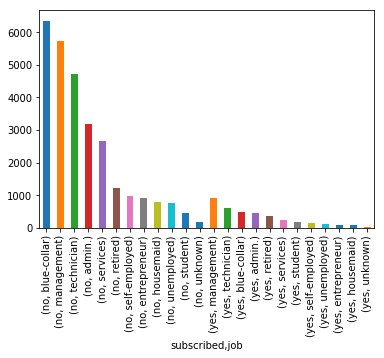

In [12]:
freq_table = pd.crosstab(train_data['job'],train_data['subscribed'])
print(freq_table)
freq_value_counts = train_data['job'].groupby(train_data['subscribed']).value_counts()
train_data['job'].groupby(train_data['subscribed']).value_counts().plot.bar()

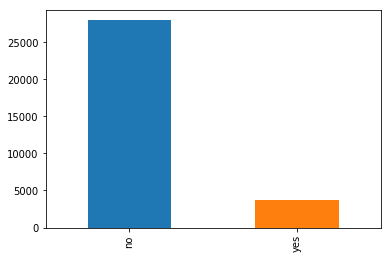

In [13]:
#train_data['job'].value_counts().plot.bar()
train_data['subscribed'].value_counts().plot.bar()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


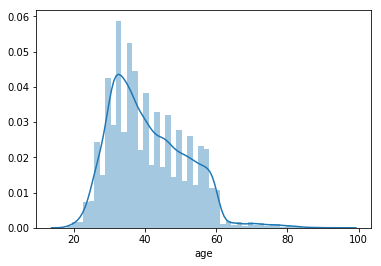

In [14]:
sns.distplot(train_data['age'])

In [15]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [16]:
train_data.head()
test_data.info()
x_train=train_data[['ID','age','balance','day','duration','campaign','pdays','previous']]
x_test=test_data[['ID','age','balance','day','duration','campaign','pdays','previous']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
ID           13564 non-null int64
age          13564 non-null int64
job          13564 non-null object
marital      13564 non-null object
education    13564 non-null object
default      13564 non-null object
balance      13564 non-null int64
housing      13564 non-null object
loan         13564 non-null object
contact      13564 non-null object
day          13564 non-null int64
month        13564 non-null object
duration     13564 non-null int64
campaign     13564 non-null int64
pdays        13564 non-null int64
previous     13564 non-null int64
poutcome     13564 non-null object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
knn_submission = pd.DataFrame()
knn_submission['ID'] = test_data['ID']
knn_submission['prediction'] = knn.predict(x_test)

In [19]:
knn.score(x_train,y_train)

0.9395835308244067

In [20]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [24]:
#submission= pd.read_csv('submission.csv')

In [25]:
freq_table_df = (pd.DataFrame(freq_table)).reset_index()
print(freq_table_df)
job_type = list(np.array(freq_table_df.iloc[:,0]))
subs_no =list(np.array(freq_table_df.iloc[:,1]))
subs_yes = list(np.array(freq_table_df.iloc[:,2]))
print(job_type)
print(subs_yes,subs_no)

yes_no=['no','yes']

subscribed            job    no  yes
0                  admin.  3179  452
1             blue-collar  6353  489
2            entrepreneur   923   85
3               housemaid   795   79
4              management  5716  923
5                 retired  1212  362
6           self-employed   983  140
7                services  2649  254
8                 student   453  182
9              technician  4713  594
10             unemployed   776  129
11                unknown   180   26
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
[452, 489, 85, 79, 923, 362, 140, 254, 182, 594, 129, 26] [3179, 6353, 923, 795, 5716, 1212, 983, 2649, 453, 4713, 776, 180]


In [26]:
data = {'job_type': job_type, 'no': subs_no,  'yes': subs_yes,}

In [27]:
colors = ["#718dbf", "#e84d60"]

In [28]:
p3 = figure(x_range=job_type,plot_height=200, plot_width=1300,title='Subscribed',tools="hover",tooltips="$name , @job_type: @$name")
p3.vbar_stack(yes_no,x='job_type',source=data,color=colors,width=0.9,legend=[value(x) for x in yes_no])
p3.y_range.start = 0
p3.x_range.range_padding = 0.1
p3.xgrid.grid_line_color = None
p3.axis.minor_tick_line_color = None
p3.outline_line_color = None
p3.legend.location = "top_right"
p3.legend.orientation = "horizontal"

In [29]:
abc=pd.DataFrame(train_data['age'].value_counts()).reset_index()
age=list(np.array(abc.iloc[:,0]))
counts=list(np.array(abc.iloc[:,1]))
data1 = {'age':age, 'counts':counts}
print(counts)

[1457, 1417, 1406, 1321, 1314, 1245, 1219, 1181, 1079, 985, 960, 909, 873, 852, 844, 821, 807, 786, 749, 729, 700, 697, 667, 659, 653, 627, 600, 597, 582, 576, 564, 550, 543, 510, 420, 366, 212, 142, 109, 86, 49, 48, 47, 46, 46, 44, 43, 40, 39, 37, 35, 33, 32, 30, 29, 26, 25, 25, 24, 22, 22, 16, 15, 15, 13, 8, 8, 5, 2, 2, 2, 1, 1, 1, 1, 1]


In [30]:
p1=figure(plot_height=200,plot_width=900 ,title="Number of People in different age category",
           toolbar_location=None, tools="hover", tooltips=[("Age", "@age"), ("Count", "@counts")])
p1.vbar('age',top='counts', width=0.5, source=data1)

GlyphRenderer(id='1083', ...)

In [31]:
count_subscribed=pd.DataFrame(train_data['subscribed'].value_counts())
subscribes_count = list(np.array(count_subscribed.iloc[:,0]))
total= count_subscribed.iloc[:,0].sum()
data3= {'subscribes_count': subscribes_count,'yes_no':yes_no}
p4=figure(x_range=yes_no,plot_height=200,plot_width=400, title='Total No of people who subscribed or not', toolbar_location=None, tools="hover",tooltips=[("Yes/No","@yes_no"),("Count","@subscribes_count"),("Total","31647")])
p4.vbar('yes_no',top='subscribes_count', width=0.2,source=data3, fill_color=factor_cmap('yes_no', palette=Spectral6, factors=yes_no))
p4.x_range.range_padding = 0.1
print(total)

31647


In [32]:
#grid = gridplot([[p1,None],[p3],[p4]], plot_width=1000, plot_height=200)
#show(grid)
l=layout([
  [p1,p4],
  [p3],
], sizing_mode='fixed')
#show(l)

In [33]:
train_data['subscribed'].replace('no', 0,inplace=True)
train_data['subscribed'].replace('yes', 1,inplace=True)
corr = train_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
print(corr)

                  ID       age   balance       day  duration  campaign  \
ID          1.000000  0.013337  0.067897 -0.063399  0.007183 -0.103508   
age         0.013337  1.000000  0.103245 -0.011056 -0.003870  0.005733   
balance     0.067897  0.103245  1.000000  0.003461  0.024274 -0.012032   
day        -0.063399 -0.011056  0.003461  1.000000 -0.032288  0.159168   
duration    0.007183 -0.003870  0.024274 -0.032288  1.000000 -0.080305   
campaign   -0.103508  0.005733 -0.012032  0.159168 -0.080305  1.000000   
pdays       0.436148 -0.021947  0.001789 -0.087626  0.000529 -0.087570   
previous    0.254476  0.005761  0.013843 -0.048752  0.001783 -0.033151   
subscribed  0.296663  0.024538  0.050807 -0.029600  0.389838 -0.070607   

               pdays  previous  subscribed  
ID          0.436148  0.254476    0.296663  
age        -0.021947  0.005761    0.024538  
balance     0.001789  0.013843    0.050807  
day        -0.087626 -0.048752   -0.029600  
duration    0.000529  0.001783    

In [34]:
print(pd.crosstab(train_data['default'],train_data['subscribed']))

subscribed      0     1
default                
no          27388  3674
yes           544    41


In [35]:
target = train_data['subscribed']
train_data = train_data.drop('subscribed',1)
train_data = pd.get_dummies(train_data)

In [36]:
train_data.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
x_train,x_test1,y_train,y_test1=train_test_split(train_data, target, test_size = 0.2, random_state=46)

In [38]:
lreg=LogisticRegression()

In [39]:
lreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
prediction=lreg.predict(x_test1)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test1, prediction)

0.8992101105845182

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [45]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
predictDTC = clf.predict(x_test1)

In [47]:
accuracy_score(y_test1, predictDTC)

0.9110584518167456

In [48]:
test_data=pd.get_dummies(test_data)

In [49]:
prediction_test = clf.predict(test_data)

In [50]:
prediction_test

array([0, 0, 0, ..., 0, 1, 0])

In [51]:
submission = pd.DataFrame()

In [52]:
submission['ID'] = test_data['ID']
submission['will_subscribe?'] = prediction_test

In [53]:
submission['will_subscribe?'].replace(0,'no',inplace=True)
submission['will_subscribe?'].replace(1,'yes',inplace=True)

In [54]:
submission.to_csv('final_submission.csv', header=True, index=False)
knn_submission.to_csv('knn submission.csv',header=True, index=False)

In [55]:
(submission['will_subscribe?']==knn_submission['prediction']).sum()

12581

In [56]:
submission['will_subscribe?'].value_counts().sum()

13564

In [57]:
submission['will_subscribe?'].value_counts().sum() - (submission['will_subscribe?']==knn_submission['prediction']).sum()

983